<a href="https://colab.research.google.com/github/PKpacheco/intro_ai_project_3/blob/main/Project_3_Intro_AI_Paola_Pacheco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project 3: Text Classification-Spam and Ham and TF-IDF
Intro to AI
\
Instructor: Jeffrey Lanyon
\
Student: Paola Katherine Pacheco


In [110]:
# import libraries

import math
import matplotlib.pyplot as plt
import pandas as pd
import re


from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer
    )
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (
     train_test_split,
     cross_val_score,
     GridSearchCV
     )
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import seaborn as sns





#Task 1: Data Exploration


## 1.1 The Data:
###* Read in just the Psy file to your Jupyter Notebook. (1 point)


In [2]:
# get the psy url
url_psy = 'https://raw.githubusercontent.com/PKpacheco/intro_ai_project_3/main/Youtube01-Psy.csv'

In [5]:
# read the file
df_psy = pd.read_csv (url_psy )

In [9]:
df_psy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


### * Display the head and tail of the file. (1 point)


In [6]:
df_psy.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [7]:
df_psy.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1
349,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Benich,2015-06-05T18:05:16,The first billion viewed this because they tho...,0


###* Give the number of rows in the file. (1 point)


In [8]:
num_rows = df_psy.shape[0]
print("Number of rows in the file:", num_rows)

Number of rows in the file: 350


### * Display the number of spam and ham comments for the file. (2 points)


In [10]:
spam_count = df_psy[df_psy['CLASS'] == 1].shape[0]
ham_count = df_psy[df_psy['CLASS'] == 0].shape[0]

print("Number of spam comments:", spam_count)
print("Number of ham comments:", ham_count)


Number of spam comments: 175
Number of ham comments: 175


###* Discuss the balance of the dataset and the balance of the classes spam/ham Based on this, what sort of classifiers are appropriate for the task? (3 marks)

This dataset is perfectly balanced, it has the same number of spam and ham comments, both classes have the same number of entries.
This implies a dataset that works very well for classification since, as the classes are in balance, none will have a disadvantage during training.
I believe that models such as decision trees, random forest, svm can be options for balanced data and text classification

## 1.2 Data Transformation:


### * Create a bag-of-words for the Psy file. The fit and transform should be done on the ‘CONTENT’ of your data. (2 points)


In [12]:
vectorizer = CountVectorizer()

# fit the 'CONTENT' column
X_bow = vectorizer.fit_transform(df_psy['CONTENT'])

### * Display the matrix information. For example. (2 points)


In [13]:
X_bow

<350x1418 sparse matrix of type '<class 'numpy.int64'>'
	with 4354 stored elements in Compressed Sparse Row format>

### * How many different words are in your bag of words? (1 point)


1418 words
We have (350, 1418), 350 rows and 1418 columns (features), different words

###* Display the 349th comment in the Psy file. (2 points)


In [14]:
# considering 0 index
comment_349 = df_psy.loc[348, 'CONTENT']
print(comment_349)

hi guys please my android photo editor download. thanks https://play.google.com/store/apps/details?id=com.butalabs.photo.editor﻿


###* Using ’analyze’ ,or something similar, give the breakdown of the 349th comment. (2 points)

In [19]:
# build_analyzer method to get the word breakdown
word_breakdown = vectorizer.build_analyzer()

breakdown_349 = word_breakdown(comment_349)

print(breakdown_349)

['hi', 'guys', 'please', 'my', 'android', 'photo', 'editor', 'download', 'thanks', 'https', 'play', 'google', 'com', 'store', 'apps', 'details', 'id', 'com', 'butalabs', 'photo', 'editor']


#2.Training and Testing Sets




###* Shuffle your dataset(frac=1). (1 point)


In [20]:
# Shuffle the dataset and using the randomstate =42
df_psy_shuffled = df_psy.sample(frac=1, random_state=42)

###* Create your training and testing splits by using the first 300 entries for training and the remaining for testing. Name them appropriately. (3 points)


In [22]:
df_psy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [23]:
X = df_psy_shuffled['CONTENT']
y = df_psy_shuffled['CLASS']

# split the data, get 300 for traning and rest for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

In [25]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (300,)
Shape of X_test: (50,)
Shape of y_train: (300,)
Shape of y_test: (50,)


###* Create your training and testing attributes BOW. Name them appropriately. (2 points)


In [26]:
# vectorizer
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)


###* Create your training and testing labels. Name them appropriately. (2 points)


In [27]:
y_train_labels = y_train
y_test_labels = y_test

###* Output the matrix information of d_train_att and d_test_att. What are the dimensions of the matrices? (3 points)

In [30]:
# Get the matrix information and dimensions of them
train_att_shape = X_train_bow.shape
test_att_shape = X_test_bow.shape
train_att_dtype = X_train_bow.dtype
test_att_dtype = X_test_bow.dtype

print("Matrix information for X_train_bow:")
print("Dimensions:", train_att_shape)

print("\nMatrix information for X_test_bow:")
print("Dimensions:", test_att_shape)


Matrix information for X_train_bow:
Dimensions: (300, 1418)

Matrix information for X_test_bow:
Dimensions: (50, 1418)


#3.Random Forest Classifier

###* Implement a Random Forest classifier. With 50 trees, output. (3 points)


In [32]:
# init with 50 trees output
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

###* Train the classifier on the training data and test its performance on the testing data.(2 points)


In [33]:
# fit training data
rf_classifier.fit(X_train_bow, y_train_labels)

# predict for testing data
y_pred = rf_classifier.predict(X_test_bow)

# training accuracy
train_accuracy = rf_classifier.score(X_train_bow, y_train_labels)

# test accuracy
test_accuracy = rf_classifier.score(X_test_bow, y_test_labels)

###* Print the training and testing accuracies. (2 points)


In [34]:
print("-----------------------Random Forest Classifier Performance:")
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

-----------------------Random Forest Classifier Performance:
Training Accuracy: 1.0
Test Accuracy: 0.9


###* Cross validate using 3 folds. Output the accuracies of the folds. (3 points)


In [37]:

# 3 folds cross-validation
cv_accuracies = cross_val_score(rf_classifier, X_train_bow, y_train_labels, cv=3)

print("------------------------Cross-Validation Accuracies with 3 Folds:")
for fold, accuracy in enumerate(cv_accuracies, 1):
    print(f"Fold {fold}: {accuracy:.4f}")

------------------------Cross-Validation Accuracies with 3 Folds:
Fold 1: 0.9600
Fold 2: 0.9600
Fold 3: 0.9400


The accuracy for cross validation is very high, this means that for the test set the model works well and consistently

###* Generate a confusion matrix for the Random Forest classifier's predictions on thetest data. (3 points)


In [41]:
# create the confusion matrix
conf_mat = confusion_matrix(y_test_labels, y_pred)

###* Visualize this matrix (you may need to implement or use a utility function for visualization). (3 points)

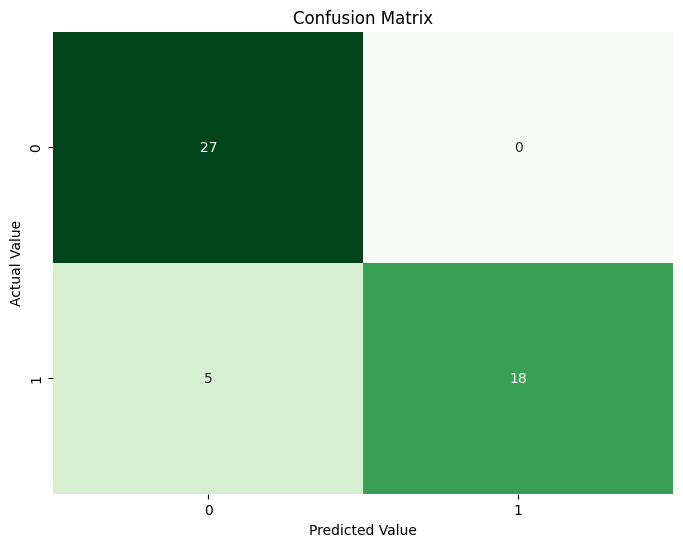

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

#4.Pipeline Data
Recall that there are five comment files, we would like to compile all of
them into a single file to use in the pipeline we create in what follows

###* Concatenate your 5 files into one using .concat. (3 points)


In [43]:
# get files url
url_kateperry = 'https://raw.githubusercontent.com/PKpacheco/intro_ai_project_3/main/Youtube02-KatyPerry.csv'
url_lmfao = 'https://raw.githubusercontent.com/PKpacheco/intro_ai_project_3/main/Youtube03-LMFAO.csv'
url_eminem = 'https://raw.githubusercontent.com/PKpacheco/intro_ai_project_3/main/Youtube04-Eminem.csv'
url_shakira = 'https://raw.githubusercontent.com/PKpacheco/intro_ai_project_3/main/Youtube05-Shakira.csv'

In [44]:
# read files
df_kate = pd.read_csv(url_kateperry)
df_lmfao = pd.read_csv(url_lmfao)
df_eminem = pd.read_csv(url_eminem)
df_sharika = pd.read_csv(url_shakira)

In [45]:
# all df
all_dataframes = [
    df_psy,
    df_kate,
    df_lmfao,
    df_eminem,
    df_sharika
    ]

# concatenate into 1 df
concat_df = pd.concat(all_dataframes, ignore_index=True)

###* Provided you have concatenated the files correctly the length of your new file should be close to 2000. Output the length. (1 point)


In [46]:
len_concat = len(concat_df)

print("Length of the concatenated file:", len_concat)

Length of the concatenated file: 1956


###* Check the spam-to-ham ratio in the new file; they should be balanced- about 1000 each. Output the number of spams and the number of hams. (2 points)


In [47]:
spam_count = concat_df['CLASS'].value_counts()[1]
ham_count = concat_df['CLASS'].value_counts()[0]

print("Number of Spam comments in concat df:", spam_count)
print("Number of Ham comments in concat df:", ham_count)


Number of Spam comments in concat df: 1005
Number of Ham comments in concat df: 951


###* Shuffle the new data and create content and label sets, and name them appropriately. (3 points)

In [49]:
shuff_concat_df = shuffle(concat_df, random_state=42)

X_content = shuff_concat_df['CONTENT']
y_labels = shuff_concat_df['CLASS']

In [50]:
X_content

1360                                  Charlie from LOST?﻿
1703                          BEST SONG EVER X3333333333﻿
1146                       Aslamu Lykum... From Pakistan﻿
1758    I absolutely adore watching football plus I’ve...
374     I really love this video.. http://www.bubblews...
                              ...                        
1130    EVERYONE PLEASE SUBSCRIBE TO MY CHANNEL OR CAN...
1294    watch youtube video &quot;EMINEM -YTMA artist ...
860                                              Awesome﻿
1459            i like the lyrics but not to music video﻿
1126               I learned the shuffle because of them﻿
Name: CONTENT, Length: 1956, dtype: object

In [51]:
y_labels

1360    0
1703    0
1146    1
1758    1
374     1
       ..
1130    1
1294    1
860     0
1459    0
1126    0
Name: CLASS, Length: 1956, dtype: int64

#5.Pipeline Creation

###* Read the sci-kit learn documentation on Pipelines. Name 3 advantages to using a pipeline. You can use any reference you wish to answer this question, just be sure to include the reference in your response. (5 points)


* **Better organization**
When you have many processes, the use of pipelines facilitates and organizes them into a sequence. The code for this process is simpler and instead of calling all the processes, you need to call only one of them and the pipeline transforms the call of one into a chain type process.

* **Optimize parameters**
Instead of updating all the parameters of all processes, when we have pipelines, they are updated simultaneously, so we can optimize the hyperparameters of countless steps at once.


* **Data security**
The use of a pipeline prevents data leakage between tests and when cross-validation is performed. With the use of pipeline we are sure that we will use the same samples for the entire process flow

References:

https://scikit-learn.org/stable/modules/compose.html#combining-estimators

https://signal-to-noise.xyz/post/sklearn-pipeline/

https://towardsdatascience.com/why-you-should-use-scikit-learn-pipelines-8754b4d1e375




###* Create a two-step pipeline with a bag-of-words step and a random forest step. (3 points)

In [53]:
# two steps pipeline (bow and random forest with same parameters from question 3)
pipe_two_steps = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('random_forest', RandomForestClassifier(n_estimators=50, random_state=42))
])

###* Output the pipeline to display its steps. (1 point)


In [54]:
# output
print(pipe_two_steps)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(n_estimators=50, random_state=42))])


###* Fit your pipeline with the first 1500 entries of the content and labels. Output. (3 points)


In [55]:
# get 1500 entries
X_content_subset = X_content[:1500]
y_labels_subset = y_labels[:1500]


In [58]:
X_content_subset.shape

(1500,)

In [59]:
y_labels_subset.shape

(1500,)

In [60]:
# Fit pipeline
pipe_two_steps.fit(X_content_subset, y_labels_subset)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

###* Use .score to score your pipeline. (2 points)


In [61]:
score_pipe = pipe_two_steps.score(X_content_subset, y_labels_subset)

print("Pipeline Score:", score_pipe)


Pipeline Score: 0.9993333333333333


###* Use your pipeline to predict whether the following two comments are spam or ham. (5 points)
1. “what a neat video”
2. “plz subscribe to my channel”


In [70]:
# comments to predict
comments_to_predict = [
    "what a neat video",
    "plz subscribe to my channel"
    ]

predict_comments = pipe_two_steps.predict(comments_to_predict)

label_definition = {
    0: "ham",
    1: "spam"
    }


prediction_table = pd.DataFrame({
    "comment": comments_to_predict,
    "prediction": [label_definition[label] for label in predict_comments]
})

print(prediction_table)

                       comment prediction
0            what a neat video        ham
1  plz subscribe to my channel       spam


###* Cross-validate using your pipeline. Use cv=3. Print out the accuracies. (3 points)

In [77]:
# 3 folds cross
cv_accuracies_pipe_1 = cross_val_score(
    pipe_two_steps,
    X_content_subset,
    y_labels_subset,
    cv=3,
    scoring='accuracy')

print("-------------------Cross-Validation accuracies with 3 Folds:")
for fold, accuracy in enumerate(cv_accuracies_pipe_1, 1):
    print(f"Fold {fold}: {accuracy:.4f}")

-------------------Cross-Validation accuracies with 3 Folds:
Fold 1: 0.9500
Fold 2: 0.9520
Fold 3: 0.9500


#6.Pipeline 2 Creation

###* Create a second pipeline named pipeline2 which includes a TfidfTransformer step.(3 points)


In [73]:
# second pipeline
pipeline2 = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('random_forest', RandomForestClassifier(n_estimators=50, random_state=42))
])


###* Cross validate pipeline2 with 3 folds. Output the accuracy.(3 points)


In [78]:
cv_accuracies_pipe_2 = cross_val_score(
    pipeline2,
    X_content_subset,
    y_labels_subset,
    cv=3,
    scoring='accuracy'
    )

print("Cross-Validation accuracies for pipeline2 with 3 folds:")
for fold, accuracy in enumerate(cv_accuracies_pipe_2, 1):
    print(f"Fold {fold}: {accuracy:.4f}")


Cross-Validation accuracies for pipeline2 with 3 folds:
Fold 1: 0.9540
Fold 2: 0.9460
Fold 3: 0.9560


###* Use the following parameter dictionary to perform a grid search. (3 points)

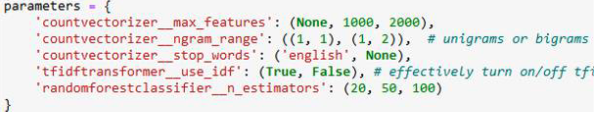

```
parameters = {
    'countvectorizer__max_features': (None, 1000, 2000),
    'countvectorizer__ngram_range': ((1,1), (1,2)),
    'countvectorizer__stop_words': ('english', None),
    'tfidtransformer__use_idf': (True, False),
    'randomforestclassifier__n_estimators': (20, 50, 1000)
}```



###* Perform the grid search, you can reduce n_estimators to 2 values and max_features to 1000 and 2000 to speed things up. (3 points)


In [85]:
# parameters reduced
parameters = {
    'count_vectorizer__max_features': [1000, 2000],
    'count_vectorizer__ngram_range': [(1, 1), (1, 2)],
    'count_vectorizer__stop_words': ['english', None],
    'tfidf_transformer__use_idf': [True, False],
    'random_forest__n_estimators': [20, 50]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline2, parameters, cv=3, scoring='accuracy')

# fit the gridsearch to data
grid_search.fit(X_content_subset, y_labels_subset)

# get best params and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best Parameters: {'count_vectorizer__max_features': 2000, 'count_vectorizer__ngram_range': (1, 2), 'count_vectorizer__stop_words': None, 'random_forest__n_estimators': 50, 'tfidf_transformer__use_idf': False}
best Score: 0.9513333333333334


###* Print out the best parameter settings. (1 point)

In [92]:
print("Best Parameters:")
for param, value in best_params.items():
    print(f"---------> {param}:", value)
print()
print("Best Score :", best_score)

Best Parameters:
---------> count_vectorizer__max_features: 2000
---------> count_vectorizer__ngram_range: (1, 2)
---------> count_vectorizer__stop_words: None
---------> random_forest__n_estimators: 50
---------> tfidf_transformer__use_idf: False

Best Score : 0.9513333333333334


#7.TF Calculation

Write python code that takes as an input a list of sentences and outputs
the TF for every term in every sentence.(7 points)
Input: list of sentences
Output: the term frequency for every word in every sentence
Test Cases:


```
sentences = [
            "Python is a great programming language",
            "Python can be used for a wide variety of programming tasks",
            "It's easy to learn Python"
]
sentences= [
          “I love math”,
          “Math is great”
          “ Math rules”
]
```



In [96]:
sentences_1 = [
            "Python is a great programming language",
            "Python can be used for a wide variety of programming tasks",
            "It's easy to learn Python"
]
sentences_2 = [
          "I love math",
          "Math is great",
          " Math rules"
]

In [97]:
sentences_1

['Python is a great programming language',
 'Python can be used for a wide variety of programming tasks',
 "It's easy to learn Python"]

In [98]:
sentences_2

['I love math', 'Math is great', ' Math rules']

In [111]:
def tokenize_sentence(sentence):
    # tokenize and apply regex to split and remove punctuation
    words = re.findall(r'\w+', sentence.lower())
    return words


In [112]:
def calculate_tf(sentences):
    term_frequency = []

    for sentence in sentences:
        words = tokenize_sentence(sentence)
        tf = Counter(words)
        term_frequency.append(tf)

    return term_frequency


In [113]:
def output_term_frequency(sentences, set_name):
    term_frequency = calculate_tf(sentences)
    print(f"{set_name}:")

    for i, tf in enumerate(term_frequency, 1):
        print(f"--------------------Term Frequency for Sentence {i}:")
        for term, frequency in tf.items():
            print(f"{term}: {frequency}")
        print()

In [114]:
# calculate and print frequency for set_1
output_term_frequency(sentences_1, "Sentences Set 1")

Sentences Set 1:
--------------------Term Frequency for Sentence 1:
python: 1
is: 1
a: 1
great: 1
programming: 1
language: 1

--------------------Term Frequency for Sentence 2:
python: 1
can: 1
be: 1
used: 1
for: 1
a: 1
wide: 1
variety: 1
of: 1
programming: 1
tasks: 1

--------------------Term Frequency for Sentence 3:
it: 1
s: 1
easy: 1
to: 1
learn: 1
python: 1



In [115]:
# calculate and print frequency for set_2
output_term_frequency(sentences_2, "Sentences Set 2")

Sentences Set 2:
--------------------Term Frequency for Sentence 1:
i: 1
love: 1
math: 1

--------------------Term Frequency for Sentence 2:
math: 1
is: 1
great: 1

--------------------Term Frequency for Sentence 3:
math: 1
rules: 1



#8.IDF Calculation:

Write Python code that calculates the inverse document frequency for a
list of sentences. (8 points)
Inputs: list of sentences
Outputs: inverse document frequency for each word in the list of sentences.
Test Cases:



```
sentences = [
            "Python is a great programming language",
            "Python can be used for a wide variety of programming tasks",
            "It's easy to learn Python"
]
sentences= [
          “I love math”,
          “Math is great”
          “ Math rules”
]
```



In [116]:
def calculate_idf(sentences):
    words_in_sentences = set()
    for sentence in sentences:
        words = tokenize_sentence(sentence)
        words_in_sentences.update(words)

    idf = {}
    total_sentences = len(sentences)

    for word in words_in_sentences:
        sentences_containing_word = sum(1 for sentence in sentences if word in tokenize_sentence(sentence))
        idf[word] = math.log(total_sentences / (sentences_containing_word + 1))

    return idf

In [127]:
def output_idf(sentences, set_name):
    idf = calculate_idf(sentences)

    print(f"{set_name}:")
    for i, sentence in enumerate(sentences, 1):
        print(f"--------------------IDF for Sentence {i}:")
        words = tokenize_sentence(sentence)
        for word in words:
            print(f"'{word}': {idf[word]}")
        print()

In [128]:
# calculate and print frequency for set_1
output_idf(sentences_1, "Sentences Set 1")

Sentences Set 1:
--------------------IDF for Sentence 1:
'python': -0.2876820724517809
'is': 0.4054651081081644
'a': 0.0
'great': 0.4054651081081644
'programming': 0.0
'language': 0.4054651081081644

--------------------IDF for Sentence 2:
'python': -0.2876820724517809
'can': 0.4054651081081644
'be': 0.4054651081081644
'used': 0.4054651081081644
'for': 0.4054651081081644
'a': 0.0
'wide': 0.4054651081081644
'variety': 0.4054651081081644
'of': 0.4054651081081644
'programming': 0.0
'tasks': 0.4054651081081644

--------------------IDF for Sentence 3:
'it': 0.4054651081081644
's': 0.4054651081081644
'easy': 0.4054651081081644
'to': 0.4054651081081644
'learn': 0.4054651081081644
'python': -0.2876820724517809



In [129]:
# calculate and print frequency for set_2
output_idf(sentences_2, "Sentences Set 2")

Sentences Set 2:
--------------------IDF for Sentence 1:
'i': 0.4054651081081644
'love': 0.4054651081081644
'math': -0.2876820724517809

--------------------IDF for Sentence 2:
'math': -0.2876820724517809
'is': 0.4054651081081644
'great': 0.4054651081081644

--------------------IDF for Sentence 3:
'math': -0.2876820724517809
'rules': 0.4054651081081644

